<a href="https://colab.research.google.com/github/baecci/ML-CBNU25/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


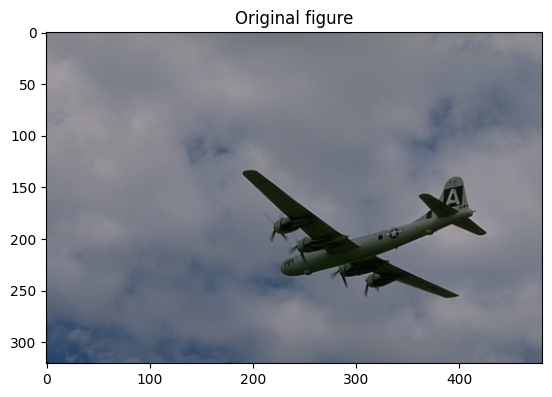

In [ ]:
# 다운받은 이미지 읽어오기 및 픽셀 데이터 전처리

input_image = cv2.imread('/content/drive/MyDrive/machine-learning-25/airplane.jpg')
#input_image = cv2.imread('/content/drive/MyDrive/machine-learning-25/tiger.jpg')

h, w, c = input_image.shape    # h: 이미지의 높이(행) 픽셀 수, w: 이미지의 넓이(열) 픽셀 수, c: 이미지의 색상 채널 수
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)    # BGR을 RGB로 변환
all_pixels = input_image.reshape((-1, 3)).astype(np.float32)   # 이미지 색상 픽셀을 배열로 변환하고 형변환

plt.title(f"Original figure")
plt.imshow(input_image)

In [ ]:
# K개의 랜덤한 픽셀의 데이터를 임시 centroids로 정함

def initialize_centroids(all_pixels, k):
    centroids = np.random.choice(all_pixels.shape[0], k, replace=False)
    return all_pixels[centroids]

In [ ]:
# 각 cluster의 거리을 계산하여 군집화

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

In [ ]:
# 각 cluster 내 산술평균을 새로운 centroid로 지정

def new_centroids(all_pixels, labels, k):
    centroids = np.zeros((k, 3))
    for i in range(k):
        cluster_pixels = all_pixels[labels == i]
        if len(cluster_pixels) > 0:    # cluster내 산술평균을 새로운 centroid로 제공
            centroids[i] = cluster_pixels.mean(axis=0)   # np.mean():산술평균을 반환. axis가 0이면 열, 1이면 행을 따라 계산
    return centroids

In [ ]:
# 모든 픽셀과 centroid 사이 거리를 계산

def compute_distances(pixels, centroids):
    return np.linalg.norm(pixels[:, None] - centroids[None, :], axis=2)

In [ ]:
# k-means clustering 수행

def kmeans_clustering(all_pixels, k=4, max_iters=100, tol=1.0):
    centroids = initialize_centroids(all_pixels, k)
    for i in range(max_iters):
        old_centroids = centroids.copy()
        distances = compute_distances(all_pixels, centroids)
        labels = assign_clusters(distances)
        centroids = new_centroids(all_pixels, labels, k)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids

In [ ]:
# clustering 실행 후 픽셀 데이터를 다시 이미지로 변환

labels, centers = kmeans_clustering(all_pixels, 2)
clustered_pixels = centers[labels].astype(np.uint8)
segmented_image1 = clustered_pixels.reshape((h, w, 3))

labels, centers = kmeans_clustering(all_pixels, 4)
clustered_pixels = centers[labels].astype(np.uint8)
segmented_image2 = clustered_pixels.reshape((h, w, 3))

labels, centers = kmeans_clustering(all_pixels, 8)
clustered_pixels = centers[labels].astype(np.uint8)
segmented_image3 = clustered_pixels.reshape((h, w, 3))

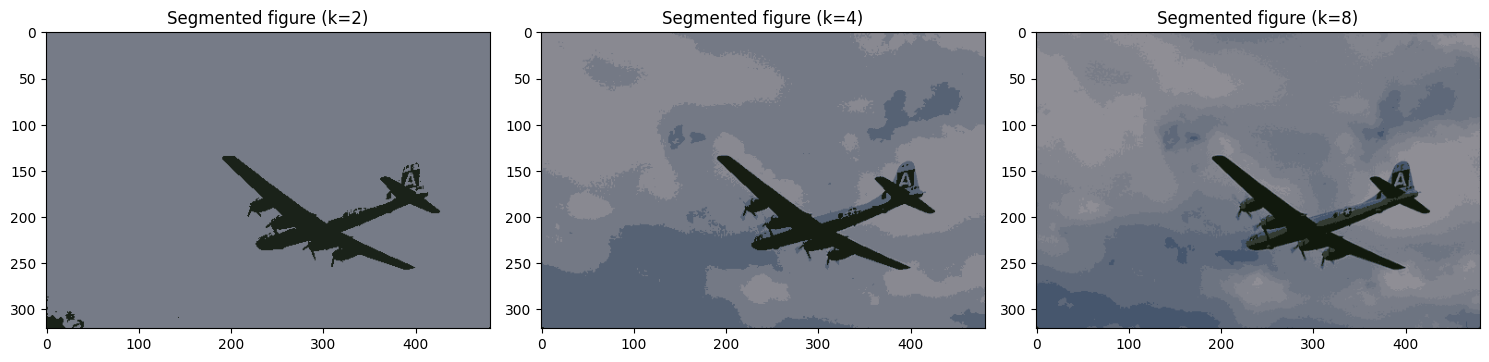

In [ ]:
# 결과 이미지
plt.figure(figsize=(15, 12))
plt.subplot(1, 3, 1)
plt.title(f"Segmented figure (k=2)")
plt.imshow(segmented_image1)
plt.subplot(1, 3, 2)
plt.title(f"Segmented figure (k=4)")
plt.imshow(segmented_image2)
plt.subplot(1, 3, 3)
plt.title(f"Segmented figure (k=8)")
plt.imshow(segmented_image3)

plt.tight_layout()
plt.show()